# SVM

## Linear SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
train_X = np.array([
    [6, -8],
    [6.5, -9],
    [9, -8.5],
    [6.5, -9],
    [5, -2.5],
    [8, -4],
    [9.5, -4],
    [9, -5],
])
train_y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

test_X = np.array([
    [5, -7],
    [5.5, -9],
    [8, -8],
    [9, -8],
    [7, -2.5],
    [8, -5],
    [5, -5],
    [6.5, -4],
])
test_y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

import pandas as pd
train = pd.read_csv("data/SVM/training.csv")
test = pd.read_csv("data/SVM/test.csv")

train_X = train[["x_1", "x_2"]].values
train_y = train["y"].values
test_X = test[["x_1", "x_2"]].values
test_y = test["y"].values

m = train_X.shape[0]
print(m)

50


### Model

In [3]:
clf = svm.SVC(kernel='linear')
clf.fit(train_X, train_y)

SVC(kernel='linear')

In [4]:
"""
clf.dual_coef_[i] = labels[i] * alphas[i]
where labels[i] is either -1 or +1 and alphas[i] are always positive.
"""
alpha = np.zeros((m,))
alpha[clf.support_] = np.abs(clf.dual_coef_)
print(f"alpha: {alpha}")
print(f"w: {clf.coef_}, intercept: {clf.intercept_}")
print(f"support vectors with idx {clf.support_}:\n{clf.support_vectors_}")

alpha: [1.         1.         1.         1.         0.         1.
 1.         1.         0.         1.         1.         0.
 1.         1.         0.24879375 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.         1.         0.         0.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.         1.         0.33132433 1.
 1.         1.         0.         0.08253057 0.         1.
 1.         1.        ]
w: [[ 1.2586557  -0.65060527]], intercept: [0.58565512]
support vectors with idx [ 0  3  7  9 12 13 14 15 16 17 23 24 32 34 35 41 43 45 47 48 49  1  2  5
  6 10 18 19 20 21 22 25 27 30 31 33 36 37 39 40 42]:
[[-1.01304     0.22403   ]
 [-0.199606   -0.739134  ]
 [-0.217446   -0.928847  ]
 [ 0.789017    0.229591  ]
 [ 0.492747   -0.785446  ]
 [-0.389211   -1.1152    ]
 [-0.51606     1.43867   ]
 [-0.480439    0.68961   ]
 [ 0.0101564   1.24418   ]
 [ 1.06694     1.07705   ]
 [ 0.0919864  -0.71

In [5]:
# analytical solution
def optimal_solution(X, y, alpha):
    w = sum((alpha[i] * y[i] * X[i]) for i in range(m))
    S_len = clf.support_.shape[0]
    b = sum((1 / y[idx] - w.T @ x_s) for idx, x_s in zip(clf.support_, clf.support_vectors_)) / S_len
    return (w, b)
w_test, b_test = optimal_solution(train_X, train_y, alpha)
print(f'w:{w_test}, equal={np.isclose(clf.coef_, w_test)}\nb:{b_test}, equal={np.isclose(clf.intercept_, b_test)}')

w:[0.80174843 1.01435192], equal=[[False False]]
b:inf, equal=[False]


<ipython-input-5-6a9b10aa344f>:5: RuntimeWarning: divide by zero encountered in long_scalars
  b = sum((1 / y[idx] - w.T @ x_s) for idx, x_s in zip(clf.support_, clf.support_vectors_)) / S_len


### Test Set

In [6]:
test_pred = clf.predict(test_X)
print(test_pred)

[1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [7]:
def linear_svm_predict(X: np.array):
    raw = np.apply_along_axis(lambda x: w_test.T @ x + b_test, axis=1, arr=X)
    print(raw)
    return np.sign(raw)
print(linear_svm_predict(test_X))

[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


### Evaluation

In [8]:
clf.score(test_X, test_y)

0.62

### Plot

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=100, linewidth=1, facecolors='none',edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

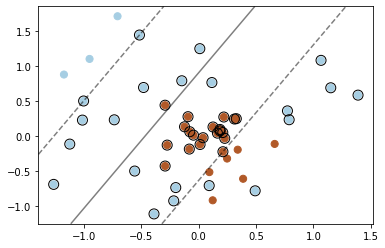

In [10]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf, plot_support=True)

## Kernel & Soft Margin SVM

The SVM model uses a 2-degree polynomial kernel, and a regularization parameter C=1 for the soft-margin penalty item.

The kernel function is chosen by observing the data shape in scatter plot, and C is determined from testing.

The SVM model achieved 92% accuracy on the test set.

### Data

In [11]:
import pandas as pd

train = pd.read_csv("data/SVM/training.csv")
test = pd.read_csv("data/SVM/test.csv")

train_X = train[["x_1", "x_2"]].values
train_y = train["y"].values
test_X = test[["x_1", "x_2"]].values
test_y = test["y"].values

### Model

In [12]:
best_C = 1
best_score = 0
for C in np.arange(0.1, 10, 0.1):
    clf = svm.SVC(kernel='poly', degree=2, C=C).fit(train_X, train_y)
    score = clf.score(test_X, test_y)
    if score > best_score:
        best_C = C
        best_score = score
print(f'Best C is {best_C} with score {best_score}')

Best C is 0.2 with score 0.92


In [13]:
clf = svm.SVC(kernel='poly', degree=2, C=best_C)
clf.fit(train_X, train_y)

SVC(C=0.2, degree=2, kernel='poly')

### Plot

In [14]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=100, linewidth=1, facecolors='none',edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

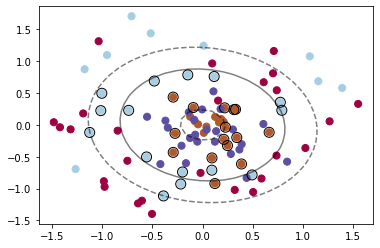

In [15]:
# Plot train and test data
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=50, cmap=plt.cm.Paired)
plt.scatter(test_X[:, 0], test_X[:, 1], c=test_y, s=50, cmap=plt.cm.Spectral)

# Plot decision function
plot_svc_decision_function(clf, plot_support=True)

### Evaluation

In [16]:
print(f'Accuracy: {clf.score(test_X, test_y)}')

Accuracy: 0.92
